In [ ]:
! pip install bqplot
! pip install pingouin
! pip install chart_studio

! pip install mlxtend
! pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=7fd435c9d9a8bece45497997ba9b32ce153a56c6c6221ec4027f21365fc9af53
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
from sklearn.cluster import DBSCAN

# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

#Montar la unidad en drive
from google.colab import drive
import os

drive.mount('/content/gdrive')

# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import get_scorer, get_scorer_names
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [ ]:
#Cargar dataset
california = fetch_california_housing()
print("Estrtura de datos:", california.data.shape)         # Dimensiones del conjunto de datos
print("Nombres features:", california.feature_names)      # Nombres de las características
print("Variable objetivo", california.target)             # Variable objetivo

# Tenemos 20640 instancias y 8 features



Estrtura de datos: (20640, 8)
Nombres features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Variable objetivo [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
# Crear un DataFrame con el conjunto de datos
cali = pd.DataFrame(california.data, columns=california.feature_names)
cali['Price'] = california.target
X = cali.drop("Price", axis=1)       # Matriz de características
y = cali['Price']

In [ ]:
cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
get_scorer_names()



['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

num_cv_folds = len(california.feature_names)

# Crear el objeto SequentialFeatureSelector
sfs_forward = SequentialFeatureSelector(estimator=LinearRegression(),
                                        k_features=8,
                                        forward=True,
                                        floating=False,
                                        scoring='neg_mean_squared_error',
                                        cv=num_cv_folds)

# Ajustar el objeto SequentialFeatureSelector a los datos
sfs_forward.fit(X, y)

# Obtener las características seleccionadas
selected_features = sfs_forward.k_feature_names_
print(selected_features)

('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude')


In [ ]:
# Método de Forward Selection
sfs_forward = SFS(LinearRegression(),
                  k_features=5,
                  forward=True,
                  floating=False,
                  scoring='r2',
                  cv=5)
#Ajuste del modelo
sfs_forward.fit(X, y)
selected_features_forward = sfs_forward.k_feature_names_
print("Forward Selection - Características seleccionadas:", selected_features_forward)

Forward Selection - Características seleccionadas: ('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population')


In [ ]:
# Método de Backward Elimination
sfs_backward = SFS(LinearRegression(),
                   k_features=5,
                   forward=False,
                   floating=False,
                   scoring='r2',
                   cv=5) #Validación cruzada
#Ajuste del modelo
sfs_backward.fit(X, y)
selected_features_backward = sfs_backward.k_feature_names_
print("Backward Elimination - Características seleccionadas:", selected_features_backward)

Backward Elimination - Características seleccionadas: ('MedInc', 'HouseAge', 'AveBedrms', 'Latitude', 'Longitude')


# Eliminación bidireccional

In [ ]:

final_num_features = 5
print(get_scorer_names())

# Crear el objeto SequentialFeatureSelector para eliminación bidireccional (stepwise)
sfs_stepwise = SequentialFeatureSelector(estimator=LinearRegression(),
                                         k_features=final_num_features,
                                         forward=True,
                                         floating=True,
                                         scoring='neg_mean_squared_error',
                                         cv=num_cv_folds)

# Ajustar el objeto SequentialFeatureSelector a los datos
sfs_stepwise.fit(X, y)

# Obtener las características seleccionadas
selected_features_stepwise = sfs_stepwise.k_feature_names_

# Método de Bi-directional Elimination (Stepwise)
sfs_stepwise = SFS(LinearRegression(),
                   k_features=5,
                   forward=True,
                   floating=True,
                   scoring='r2',
                   cv=5)
sfs_stepwise.fit(X, y)
selected_features_stepwise = sfs_stepwise.k_feature_names_
print("Bi-directional Elimination (Stepwise) - Características seleccionadas:", selected_features_stepwise)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [ ]:
#cali_y variable objetivo precio de casas
cali_y = y
print(cali_y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64


# Aplicación Modelo de Regresión Lineal

In [ ]:
#Seleccionar features  a partir del método de stepwise
cali_X = cali [['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']]
print(cali_X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(cali_X, cali_y, test_size=0.2, random_state=42)


# Crear un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


       MedInc  HouseAge  AveRooms  AveBedrms  Population
0      8.3252      41.0  6.984127   1.023810       322.0
1      8.3014      21.0  6.238137   0.971880      2401.0
2      7.2574      52.0  8.288136   1.073446       496.0
3      5.6431      52.0  5.817352   1.073059       558.0
4      3.8462      52.0  6.281853   1.081081       565.0
...       ...       ...       ...        ...         ...
20635  1.5603      25.0  5.045455   1.133333       845.0
20636  2.5568      18.0  6.114035   1.315789       356.0
20637  1.7000      17.0  5.205543   1.120092      1007.0
20638  1.8672      18.0  5.329513   1.171920       741.0
20639  2.3886      16.0  5.254717   1.162264      1387.0

[20640 rows x 5 columns]


LinearRegression()

# MAE

## Al interpretar el MAE:

Un MAE más bajo indica que las predicciones del modelo están más cerca de los valores reales, lo que es deseable.
Un MAE más alto indica que las predicciones tienen un mayor error absoluto y están más alejadas de los valores reales.
Ventajas de MAE

El MAE que obtiene está en la misma unidad que la variable de salida.
Es más robusto a los valores atípicos.
Desventajas de MAE

El gráfico de MAE no es diferenciable, por lo que debemos aplicar varios optimizadores, como el descenso de gradiente, que puede ser diferenciable.

In [ ]:
# Calcular las métricas de evaluación
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir las métricas
print(f"MAE: {mae}")

MAE: 0.5801500935776256


#MSE

## Al interpretar el MSE:

Un MSE más bajo indica que las predicciones del modelo están más cerca de los valores reales, lo que es deseable.
Un MSE más alto indica que las predicciones tienen errores más grandes en relación con los valores reales.
El MSE penaliza más los errores grandes debido a la operación de elevar al cuadrado, por lo que es más sensible a los errores significativos. Es importante considerar la escala de los datos al interpretar el MSE, ya que su valor puede variar según la unidad de medida de la variable objetivo.

In [ ]:
# Predecir los valores en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.6434176482701135


# R2


Interpretando el valor de R2:

Un valor de R2 cercano a 1 (por ejemplo, 0.9 o superior) indica que el modelo explica una gran parte de la variabilidad en los datos y se ajusta bien a ellos.
Un valor de R2 cercano a 0 indica que el modelo no puede explicar adecuadamente la variabilidad en los datos y no se ajusta bien.


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

R^2: 0.5089947802907753


R2 es una métrica que indica el rendimiento del modelo, entre 0 y 1.
MAE y MSE dependen del contexto

# RMSE

Al interpretar el RMSE:

Un RMSE más bajo indica que las predicciones del modelo están más cerca de los valores reales, lo que es deseable.

Un RMSE más alto indica que las predicciones tienen errores más grandes en relación con los valores reales.

El RMSE es especialmente útil para comprender cuánto se espera que las predicciones del modelo varíen en términos de unidades absolutas en relación con los valores reales. Al igual que el MSE, es importante considerar la escala de los datos al interpretar el RMSE.

In [ ]:
# Calcular las métricas de evaluación
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 0.80213318611694


# Modelos de clasificacion

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
sns.set_style('whitegrid')

In [ ]:
# Cargar el conjunto de datos de cancer de mama
data = load_breast_cancer()
print("Estructura datos:", data.data.shape)         # Dimensiones del conjunto de datos
print("Feature:", data.feature_names)      # Nombres de las características
print("Variable objetivo:", data.target)

# 569 instancias y 30 features

Estructura datos: (569, 30)
Feature: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Variable objetivo: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1

In [ ]:
# Convertimos el objeto en un DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Definimos matriz de diseño X y vector respuesta y
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = abs(pd.Series(data['target']) - 1)

In [ ]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=42) #MODELO DE CLasificacion
#Ajuste de datos
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

## Matriz de confusión

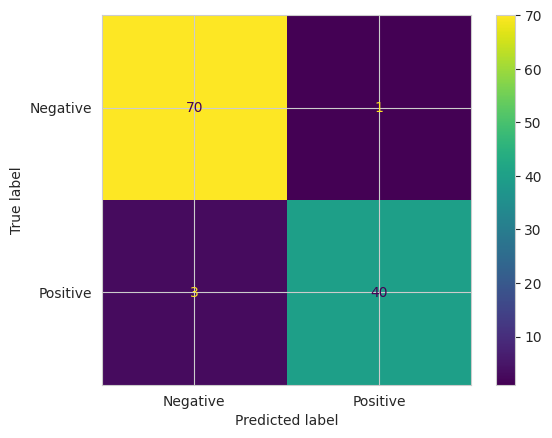

In [ ]:
# Crea una instancia de ConfusionMatrixDisplay desde las predicciones y los verdaderos valores
disp = ConfusionMatrixDisplay.from_predictions(y_test, preds, display_labels=['Negative', 'Positive'])

La matriz de confusión resultante, [70, 1, 3, 40], es una representación unidimensional que contiene cuatro valores. Estos valores representan:

70: Verdaderos positivos (True Positives, TP): El número de muestras que fueron clasificadas correctamente como positivas (clase 1 malignos) por el modelo.
1: Falsos negativos (False Negatives, FN): El número de muestras que fueron clasificadas incorrectamente como negativas (clase 0 benigno) por el modelo cuando en realidad eran positivas.
3: Falsos positivos (False Positives, FP): El número de muestras que fueron clasificadas incorrectamente como positivas por el modelo cuando en realidad eran negativas.
40: Verdaderos negativos (True Negatives, TN): El número de muestras que fueron clasificadas correctamente como negativas por el modelo.

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

